In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

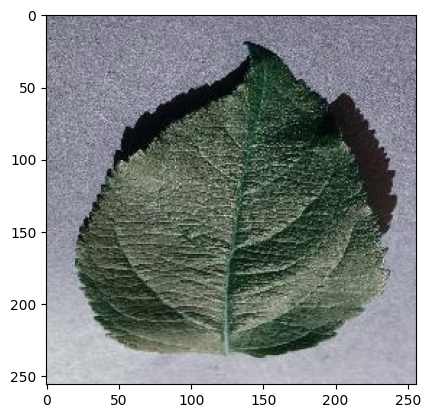

In [2]:
img = cv2.imread('./image1.jpg')
plt.imshow(img)
plt.show()

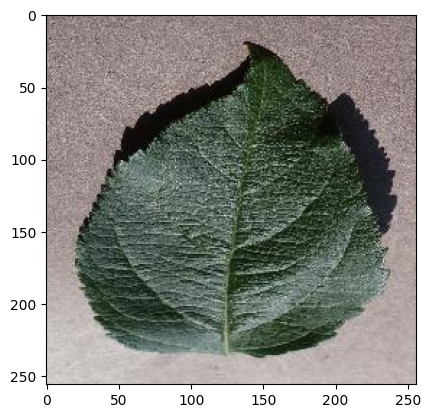

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

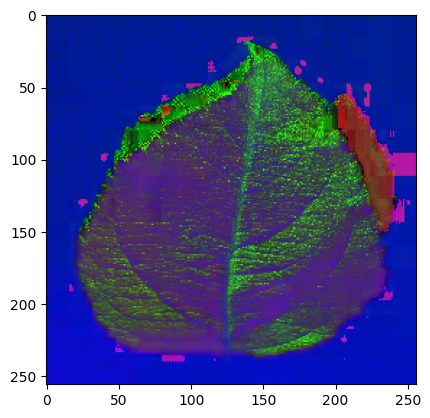

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

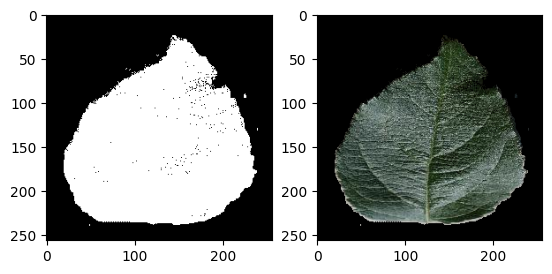

In [5]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

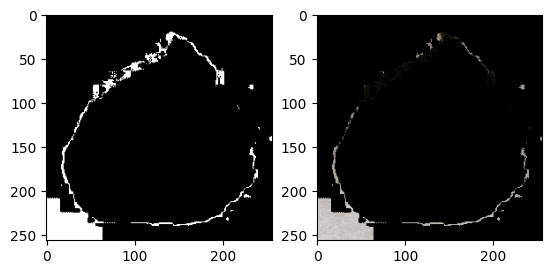

In [6]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

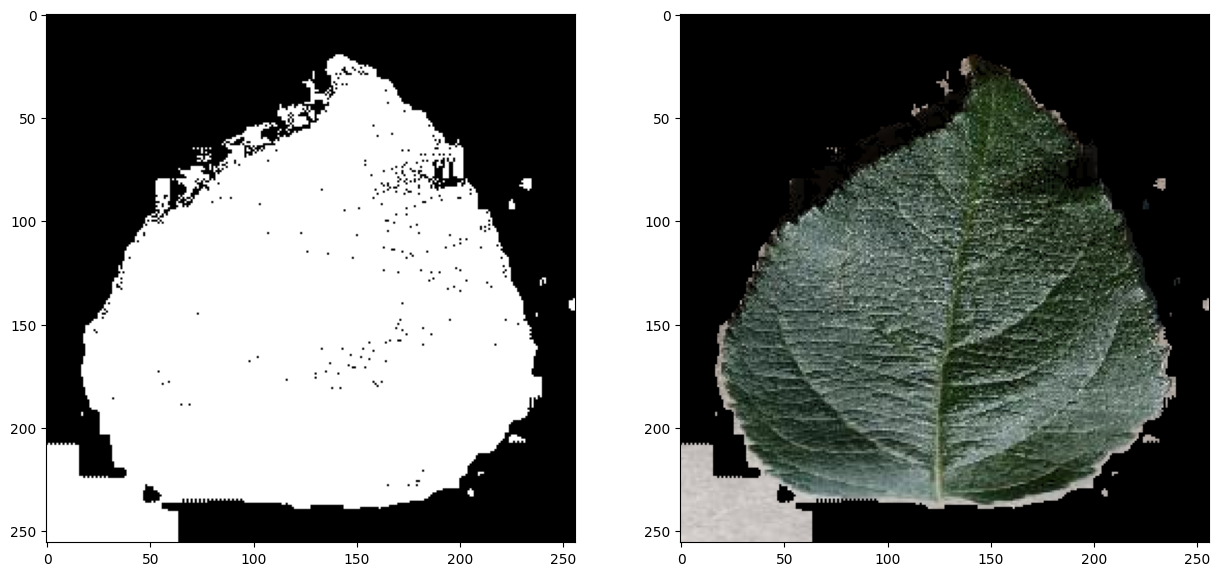

In [7]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [8]:
# Feature Descripotor

akaze = cv2.AKAZE_create()
# Find keypoints and descriptors directly
kp, des = akaze.detectAndCompute(final_result,None)
len(kp)

89

In [9]:
print(kp)

(< cv2.KeyPoint 000001931733A700>, < cv2.KeyPoint 000001931756DE00>, < cv2.KeyPoint 00000193176C7990>, < cv2.KeyPoint 00000193176C7A20>, < cv2.KeyPoint 00000193176C7D80>, < cv2.KeyPoint 00000193176C7090>, < cv2.KeyPoint 00000193176C7D50>, < cv2.KeyPoint 00000193176C7CF0>, < cv2.KeyPoint 00000193176C72D0>, < cv2.KeyPoint 00000193176C7FC0>, < cv2.KeyPoint 00000193176C7F30>, < cv2.KeyPoint 00000193176C7AB0>, < cv2.KeyPoint 00000193176C7A80>, < cv2.KeyPoint 00000193176C7BA0>, < cv2.KeyPoint 00000193176C7870>, < cv2.KeyPoint 00000193176C7300>, < cv2.KeyPoint 00000193176C5D40>, < cv2.KeyPoint 00000193176C7ED0>, < cv2.KeyPoint 00000193176C73C0>, < cv2.KeyPoint 00000193173C9680>, < cv2.KeyPoint 00000193173C9620>, < cv2.KeyPoint 00000193173C9650>, < cv2.KeyPoint 00000193173C96B0>, < cv2.KeyPoint 000001931761E8E0>, < cv2.KeyPoint 000001931761E6D0>, < cv2.KeyPoint 000001931761E5E0>, < cv2.KeyPoint 000001931761E670>, < cv2.KeyPoint 000001931761E880>, < cv2.KeyPoint 000001931761F240>, < cv2.KeyPoin

In [10]:
print(des)

[[  8 238   3 ...   3 240  60]
 [224  31   0 ... 123 247   0]
 [ 64 237  31 ... 255   6   7]
 ...
 [165 231 237 ... 158  51   1]
 [128 130  17 ... 255 119   1]
 [200  93  19 ... 255 255  63]]


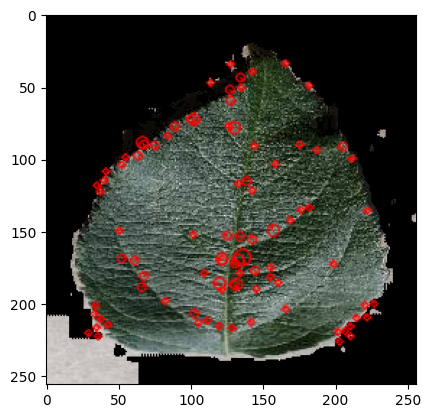

In [11]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)
plt.imshow(img2)
plt.show()

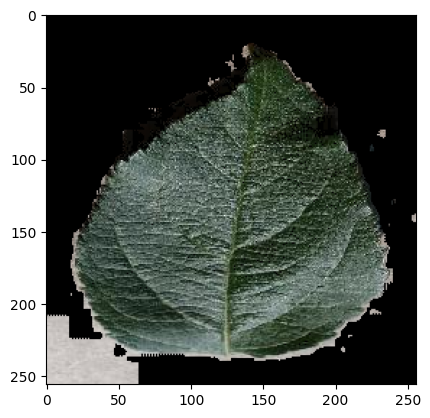

In [12]:
plt.imshow(final_result)


In [13]:
# global Feature
global_feature = des

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [15]:
global_feature.shape

(89, 61)

In [16]:
akaze.descriptorSize()

61

In [17]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))


[STATUS] feature vector size (89, 61)


In [18]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")